# Streaming Finance Data with AWS Lambda

Data Transformation
In our collector lambda, using the yfinance module (documentation here),I collect one full day’s worth of stock HIGH and LOW prices for each company listed below on Tuesday, November 30th 2021, at a five minute interval. 
- Facebook (FB)
- Shopify (SHOP)
- Beyond Meat (BYND)
- Netflix (NFLX)
- Pinterest (PINS)
- Square (SQ)
- The Trade Desk (TTD)
- Okta (OKTA)
- Snap (SNAP)
- Datadog (DDOG)

After setting up a Glue crawler so that I can run AWS Athena queries against the data. Then, in Athena, write and run a query that gives us the highest hourly stock “high” per company and the lowest hourly stock “low” per company from the list above.

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df=pd.read_csv('results.csv')

In [101]:
df.head()

,Company_name,Hour,Datetime_high,Highest_hourly_price,Lowest_hourly_price
0,BYND,10,2021-11-30 09:35:00-05:00,74.543999,72.620300
1,BYND,11,2021-11-30 10:00:00-05:00,73.279999,70.180000
2,BYND,12,2021-11-30 11:20:00-05:00,71.040001,70.070000
3,BYND,13,2021-11-30 12:30:00-05:00,71.019997,69.519997
4,BYND,14,2021-11-30 13:55:00-05:00,71.239998,70.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          70 non-null     object 
 1   Hour                  70 non-null     int64  
 2   Datetime_high         70 non-null     object 
 3   Highest_hourly_price  70 non-null     float64
 4   Lowest_hourly_price   70 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ KB


## Let's see the highest and lowest price for each company on 11/30/2021 with bar chart

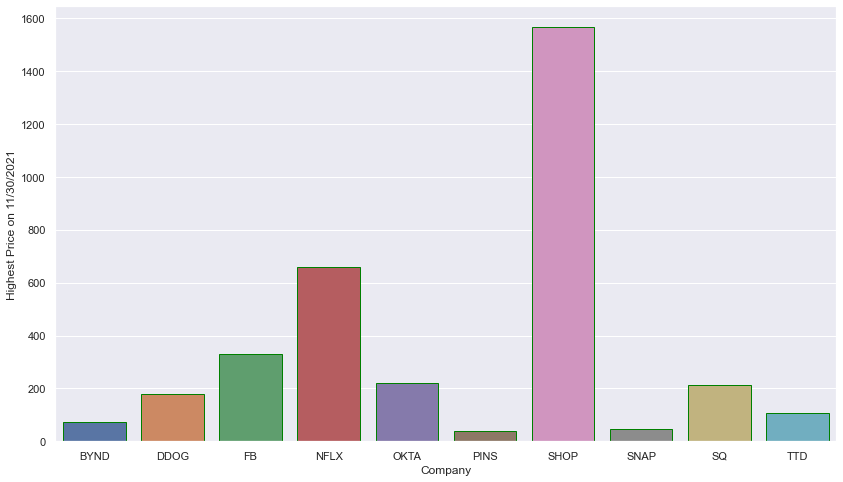

In [103]:
plt.figure(figsize=(14, 8))

sns.set(style="darkgrid")

bar_highest=sns.barplot(x="Company_name", 
            y="Highest_hourly_price", 
            data=df,
            edgecolor= 'green',
            ci = None)

bar_highest.set(xlabel='Company', ylabel='Highest Price on 11/30/2021')
plt.show()

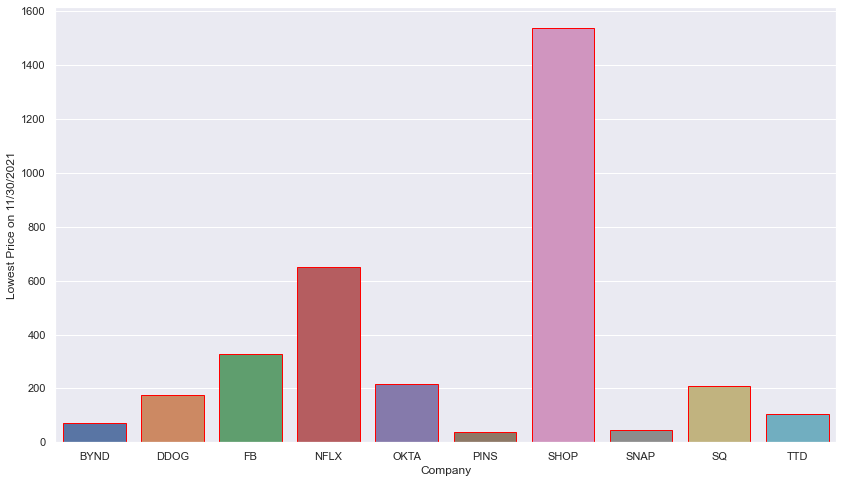

In [104]:
plt.figure(figsize=(14, 8))

sns.set(style="darkgrid")

bar_lowest=sns.barplot(x="Company_name", 
            y="Lowest_hourly_price", 
            data=df,
            edgecolor= 'red',
            ci = None)

bar_lowest.set(xlabel='Company', ylabel='Lowest Price on 11/30/2021')
plt.show()

## It's hard to tell the difference, so we dive into one company to compare the highest hourly price with  lowest hourly price. Let's choose FB as an example.

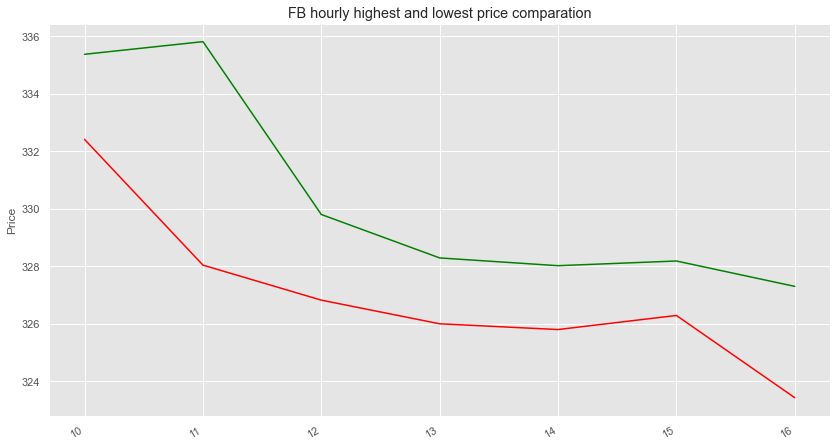

In [105]:
fb_df=df[(df['Company_name'] == "FB")]

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(14, 8))
fig.autofmt_xdate()

ax.plot(fb_df["Hour"], fb_df["Highest_hourly_price"], color ="green")
ax.plot(fb_df["Hour"], fb_df["Lowest_hourly_price"], color ="red")

ax.set_ylabel("Price")
ax.set_title("FB hourly highest and lowest price comparation")
plt.show()

## We can use this exmaple to plot any company to see the hourly highest and lowest price comparation, so we can get the overall volatility of the stock. Next, I'll compare different stocks with different price range.

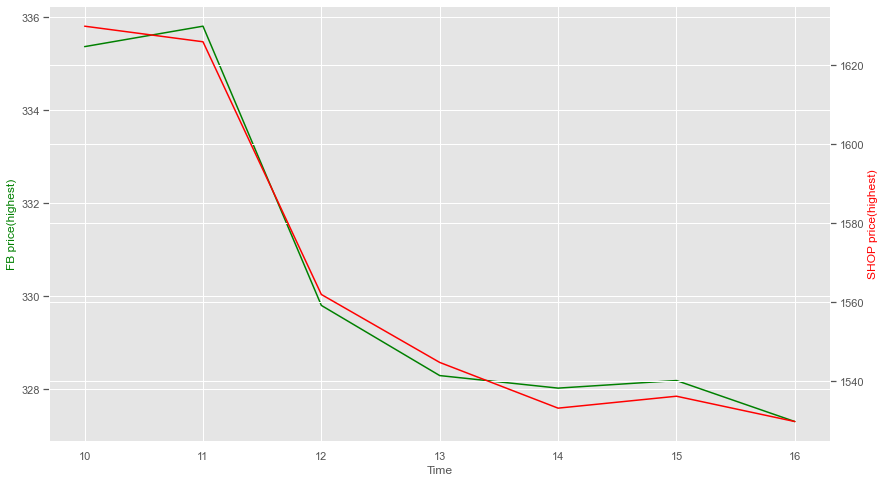

In [106]:
fb_df=df[(df['Company_name'] == "FB")]
shop_df=df[(df['Company_name'] == "SHOP")]


fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(fb_df.Hour, fb_df["Highest_hourly_price"], color="green")
ax.set_xlabel("Time")
ax.set_ylabel("FB price(highest)", color="green")

ax2 = ax.twinx()
ax2.plot(shop_df.Hour, shop_df["Highest_hourly_price"], color="red")
ax2.set_ylabel("SHOP price(highest)", color="red")
plt.show()

## From the above figure, we can see these two stocks have simillar trends in the same time period. Now, we can compare different stocks to see their overall volatility in real time.